In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# load dataset
data = pd.read_csv('group_23.csv')

In [14]:
# overview da estrutura básica

print(f"Shape: {data.shape}")
print(f"Número de samples: {data.shape[0]}")
print(f"Número de features: {data.shape[1]}")

Shape: (3000, 49)
Número de samples: 3000
Número de features: 49


In [15]:
# verificar nomes e data types -- não há datatypes inválidos
print(data.dtypes)

duration_1                       float64
duration_2                       float64
duration_3                       float64
duration_4                       float64
duration_5                       float64
loudness_level                   float64
popularity_level                 float64
tempo_class                      float64
time_signature                   float64
key_mode                         float64
artist_song_count                float64
album_freq                       float64
movement_index                   float64
intensity_level                  float64
verbal_density                   float64
purity_score                     float64
positivity_index                 float64
activity_rate                    float64
loudness_intensity               float64
happy_dance                      float64
acoustics_instrumental           float64
artists_avg_popularity           float64
tempo_vs_genre                   float64
energy_rank_pct                  float64
loud_energy_rati

In [16]:
# análise de valores em falta

missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100
missing_summary = pd.DataFrame({'Contagem de valores em falta': missing_data, 'Percentagem de valores em falta': missing_percent})

print(missing_summary[missing_summary['Contagem de valores em falta'] > 0])

Empty DataFrame
Columns: [Contagem de valores em falta, Percentagem de valores em falta]
Index: []


In [17]:
# verificar se existem linhas duplicadas -- duplicates afetam negativamente a análise ao inflacionar padrões
print(f"Número de linhas duplicadas: {data.duplicated().sum()}")

Número de linhas duplicadas: 0


In [18]:
# análise de features numericas e categoricas separadamente
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# numerical
print("Sumário das features numéricas - quantidade, média, dispersão, intervalo de valores, distribuição e outliers")
numerical_summary = data[numerical_cols].describe()
print(numerical_summary)
print("\n")

Sumário das features numéricas - quantidade, média, dispersão, intervalo de valores, distribuição e outliers
        duration_1   duration_2   duration_3   duration_4   duration_5  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      0.095000     0.331000     0.333333     0.232333     0.008333   
std       0.293264     0.470652     0.471483     0.422391     0.090921   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       loudness_level  popularity_level  tempo_class  time_signature  \
count     3000.000000       3000.000000  3000.000000     3000.000000   
mean         1.639667          1.458667     0.978667        0.154791   
std     

In [19]:
# skewness and kurtosis
# skewness mede a assimetria da distribuição (0 - distribuição normal | positvo - pico tende para a esquerda | negativo - pico tende para a direita
# kurtosis descreve a distribuição dos dados à volta da média (positivo - mais outliers | negativo - menos outliers)

skewness = data[numerical_cols].skew()
kurtosis = data[numerical_cols].kurtosis()

additional_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})
print(additional_stats)

                                Skewness    Kurtosis
duration_1                      2.763861    5.642688
duration_2                      0.718633   -1.484557
duration_3                      0.707461   -1.500500
duration_4                      1.268234   -0.391844
duration_5                     10.822454  115.202317
loudness_level                  0.102475   -1.412719
popularity_level                1.311554    0.163031
tempo_class                    -0.702248   12.884426
time_signature                 -7.885085   89.608380
key_mode                       -0.095833   -1.269686
artist_song_count               2.925218    9.701253
album_freq                      1.912720    3.780198
movement_index                 -0.654822    0.074812
intensity_level                -1.490323    4.678333
verbal_density                  2.786757    9.872430
purity_score                    0.759016   -0.633160
positivity_index               -0.844261    0.005495
activity_rate                   0.642758   -0.

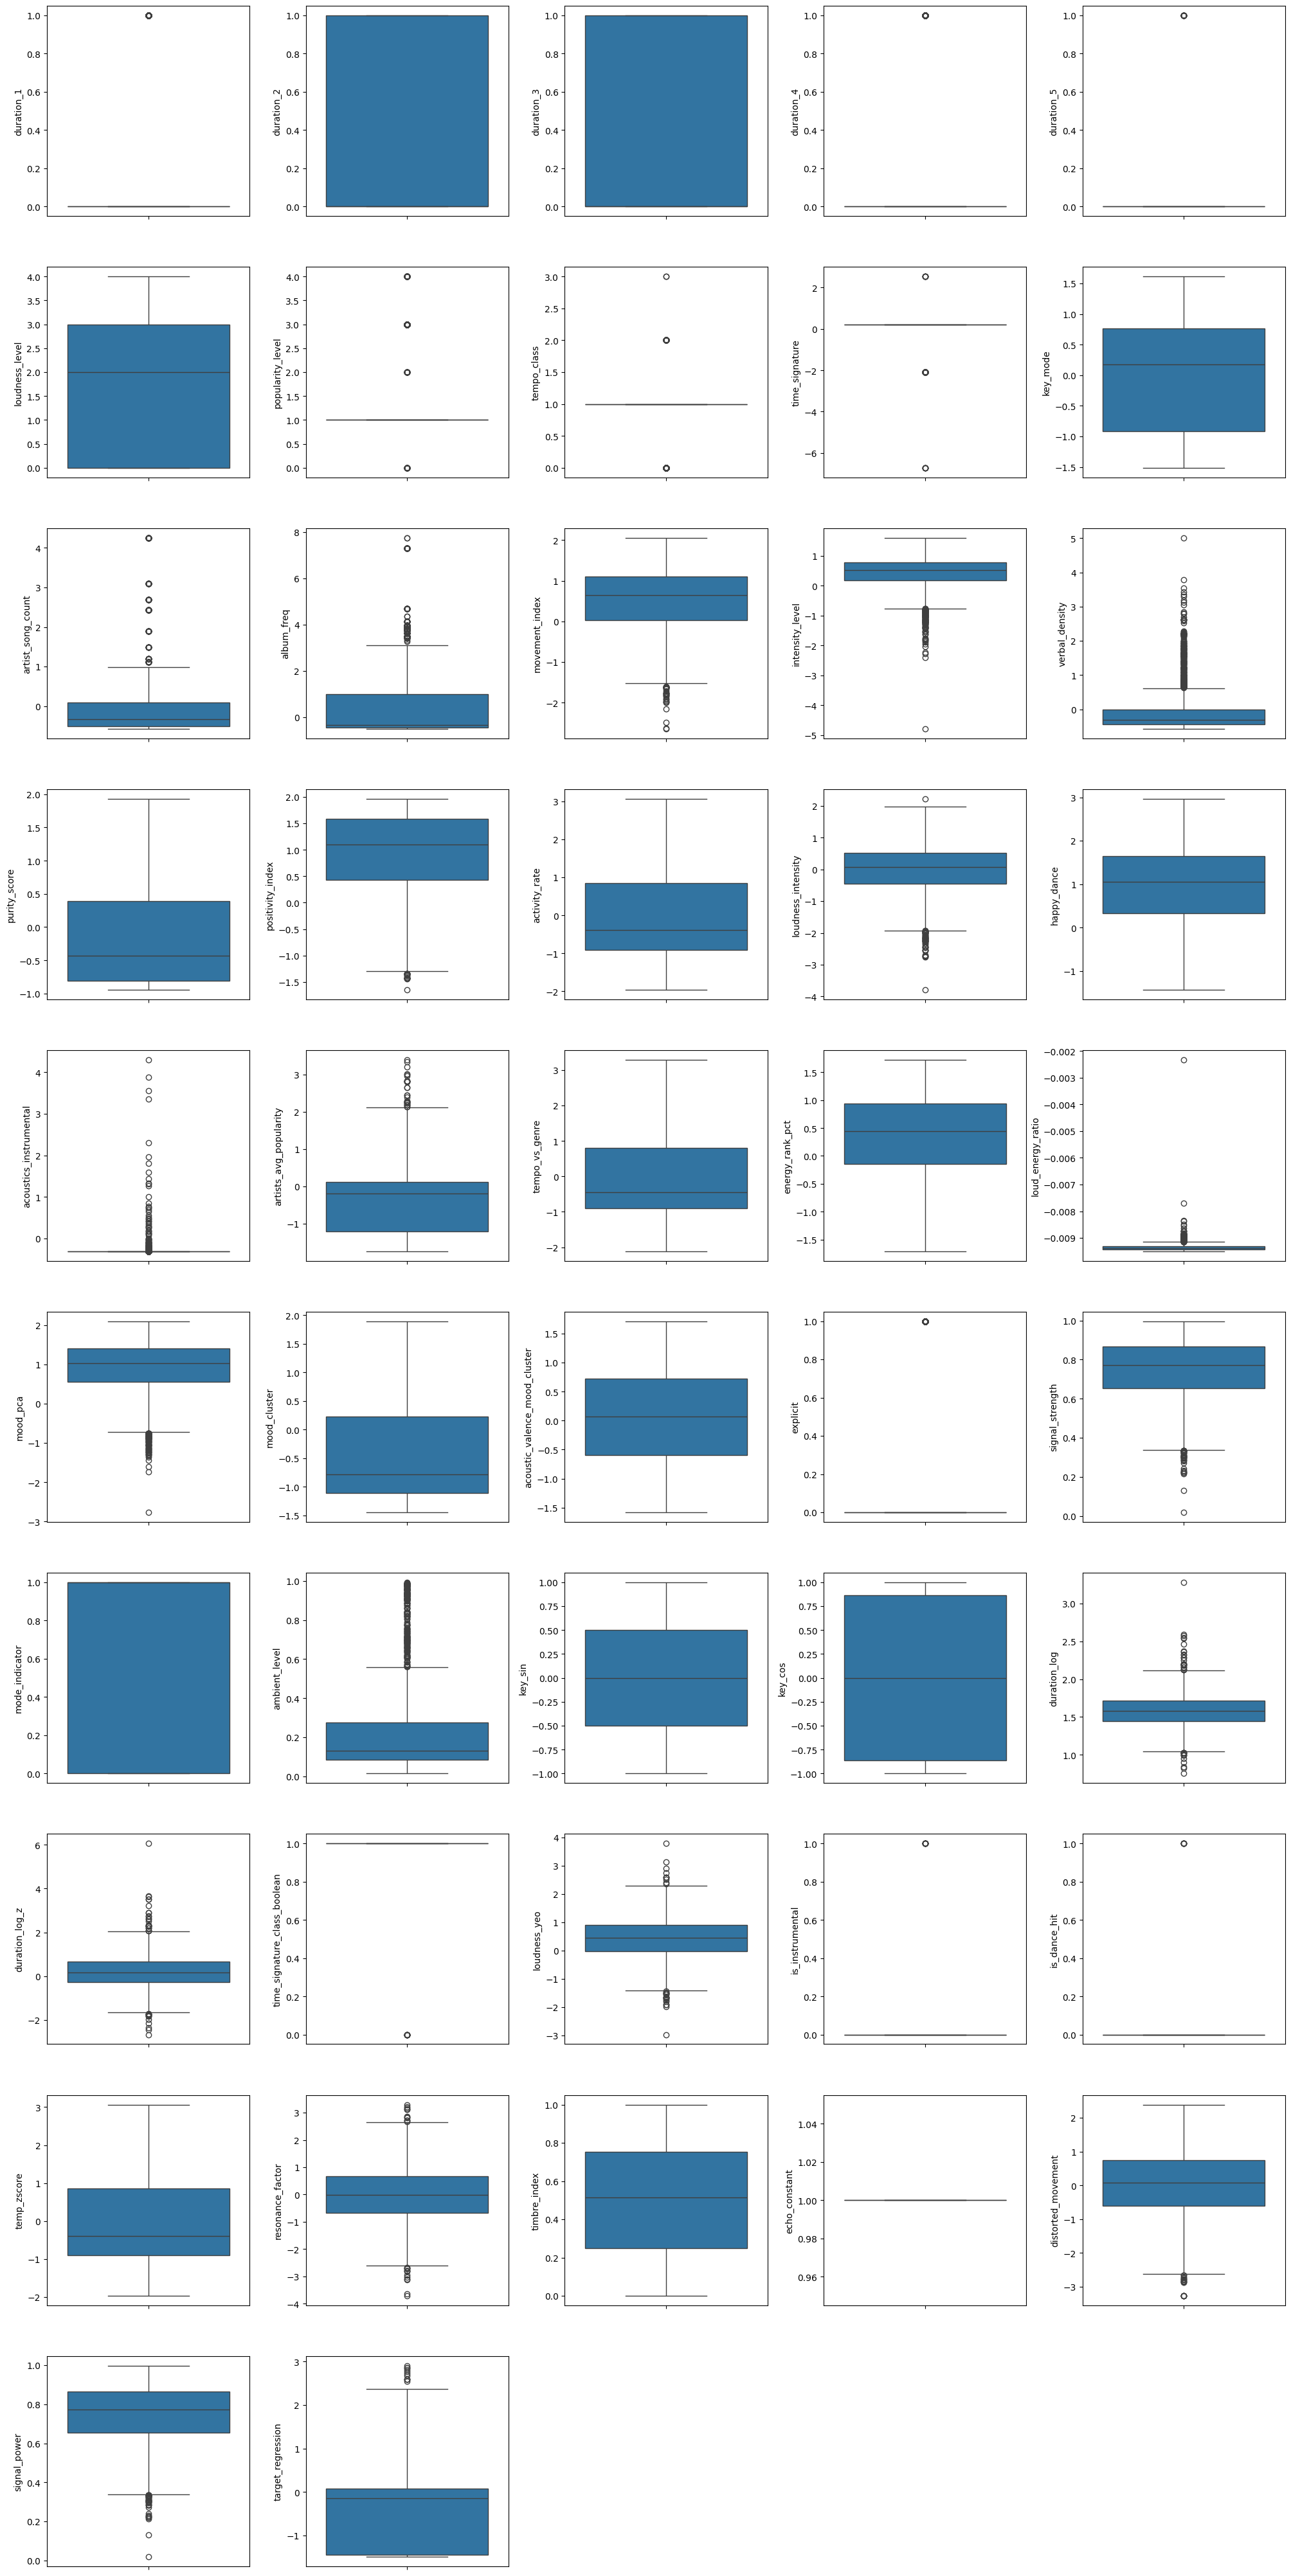

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# to calculate the grid size based on number of features
import math

# VISUALIZING OUTLIERS

features = numerical_cols
n_features = len(features)

# calculate optimal grid size
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 4*n_rows))
axs = axs.flatten()

for index, feature in enumerate(features):
    sns.boxplot(y=feature, data=data, ax=axs[index])
    
# hiding any unused subplots
for index in range(len(features), len(axs)):
    axs[index].set_visible(False)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [43]:
# checking outlier percentage in every column

for k in data[numerical_cols]:
        v = data[k]  # Get the column data from your DataFrame
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column duration_1 outliers = 100.00%
Column duration_2 outliers = 0.00%
Column duration_3 outliers = 0.00%
Column duration_4 outliers = 100.00%
Column duration_5 outliers = 100.00%
Column loudness_level outliers = 0.00%
Column popularity_level outliers = 100.00%
Column tempo_class outliers = 100.00%
Column time_signature outliers = 100.00%
Column key_mode outliers = 0.00%
Column artist_song_count outliers = 7.10%
Column album_freq outliers = 8.23%
Column movement_index outliers = 1.07%
Column intensity_level outliers = 4.17%
Column verbal_density outliers = 8.93%
Column purity_score outliers = 0.00%
Column positivity_index outliers = 0.63%
Column activity_rate outliers = 0.00%
Column loudness_intensity outliers = 1.93%
Column happy_dance outliers = 0.00%
Column acoustics_instrumental outliers = 20.47%
Column artists_avg_popularity outliers = 0.97%
Column tempo_vs_genre outliers = 0.00%
Column energy_rank_pct outliers = 0.00%
Column loud_energy_ratio outliers = 5.27%
Column mood_pca out

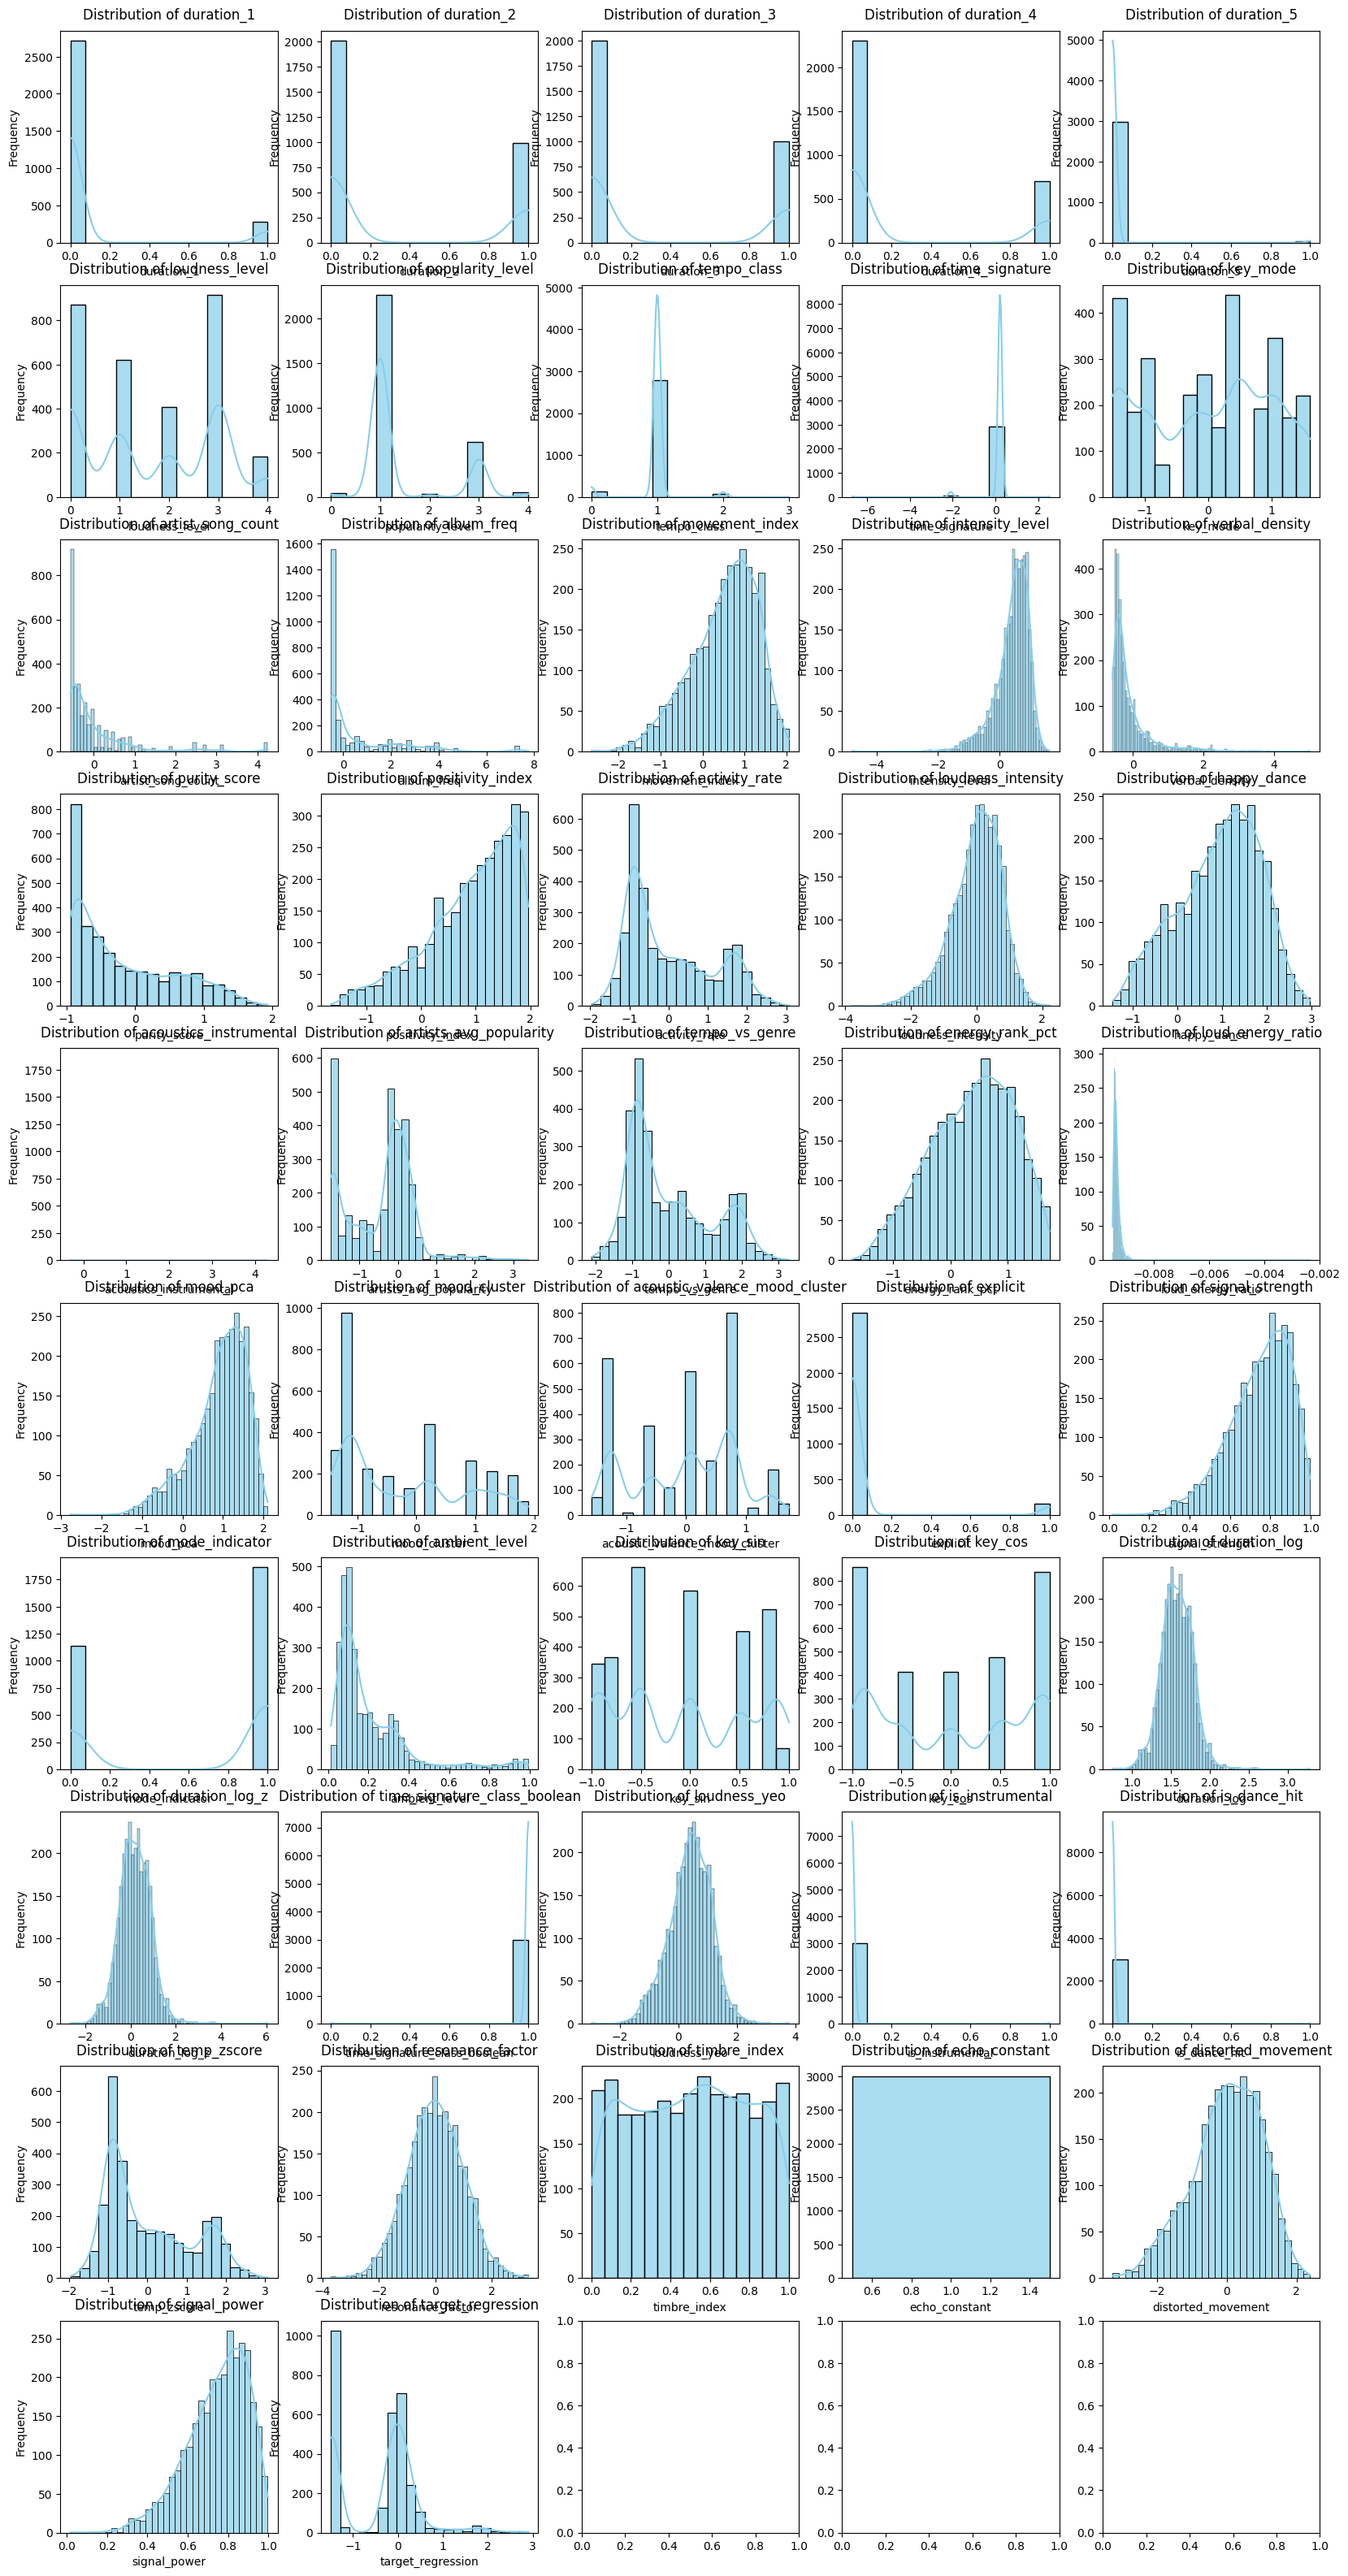

In [51]:
# distribution

fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 4*n_rows))
axs = axs.flatten() if n_rows > 1 else [axs]

for index, feature in enumerate(features):
    # Create histogram with density curve
    sns.histplot(data[feature], ax=axs[index], kde=True, alpha=0.7, color='skyblue')
    axs[index].set_title(f'Distribution of {feature}', fontsize=12, pad=30)
    axs[index].set_xlabel(feature, fontsize=10, pad=10)
    axs[index].set_ylabel('Frequency', fontsize=10, pad=10)

In [38]:
# sumário das características categóricas

print("\n=== CATEGORICAL FEATURES SUMMARY ===")

# looking at each categorical feature one by one
for col in categorical_cols:
    print(f"\n--- Analyzing: {col} ---")
    
    # Count how many different categories exist
    num_categories = data[col].nunique()
    print(f"This feature has {num_categories} different categories")
    
    # Show the most common categories and how often they appear
    print("Most common values and their counts:")
    value_counts = data[col].value_counts()
    print(value_counts.head())  # Show top 5 most frequent
    
    # Also show percentages to understand distribution
    print("As percentages:")
    percentages = data[col].value_counts(normalize=True) * 100
    print(percentages.head().round(2))


=== CATEGORICAL FEATURES SUMMARY ===

--- Analyzing: focus_factor ---
This feature has 1272 different categories
Most common values and their counts:
focus_factor
0.0         1135
3.33e-05      12
0.000141      12
2.11e-06      11
0.0085        11
Name: count, dtype: int64
As percentages:
focus_factor
0.0         37.83
3.33e-05     0.40
0.000141     0.40
2.11e-06     0.37
0.0085       0.37
Name: proportion, dtype: float64

--- Analyzing: target_class ---
This feature has 3 different categories
Most common values and their counts:
target_class
class_69     1000
class_97     1000
class_102    1000
Name: count, dtype: int64
As percentages:
target_class
class_69     33.33
class_97     33.33
class_102    33.33
Name: proportion, dtype: float64


In [21]:
print("As categorias estão perfeitamente balanceadas, o que indica que o modelo não será biased")

As categorias estão perfeitamente balanceadas, o que indica que o modelo não será biased


AttributeError: 'numpy.ndarray' object has no attribute 'barh'

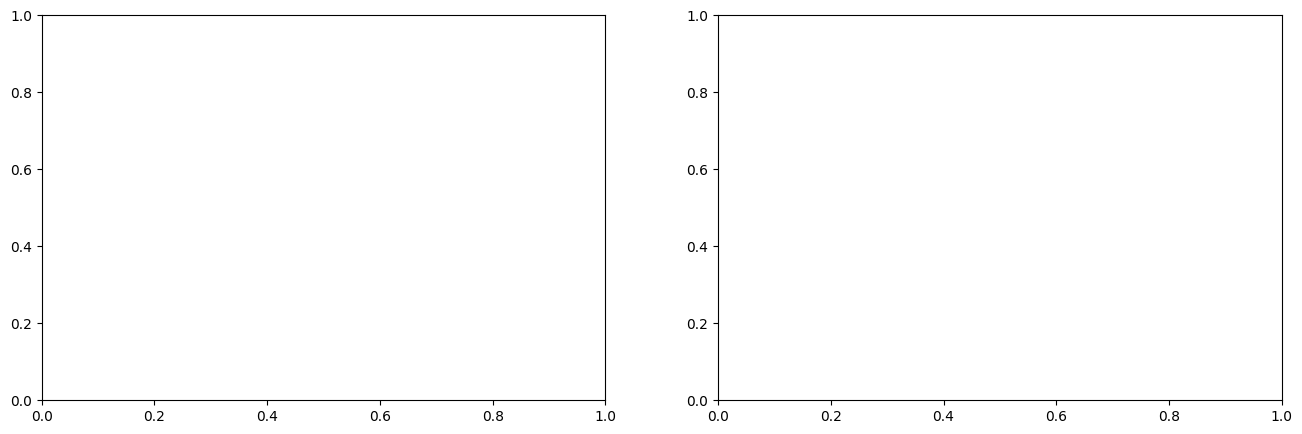

In [52]:
## Bar chart

# Calculate grid size
n_cols = 2
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(16, 5 * n_rows))
axs = axs.flatten() if n_rows > 1 else [axs]

for index, col in enumerate(categorical_cols):
    value_counts = data[col].value_counts()
    
    # For features with many categories, show only top 10
    if len(value_counts) > 10:
        plot_data = value_counts.head(10)
        title_suffix = f"\n(Showing top 10 of {len(value_counts)} categories)"
    else:
        plot_data = value_counts
        title_suffix = f"\n({len(value_counts)} categories)"
    
    # Create horizontal bar chart (easier to read long category names)
    bars = axs[index].barh(range(len(plot_data)), plot_data.values, 
                          color='lightcoral', alpha=0.7, edgecolor='darkred')
    
    axs[index].set_yticks(range(len(plot_data)))
    axs[index].set_yticklabels([str(x) for x in plot_data.index])
    axs[index].set_title(f'{col}{title_suffix}', fontsize=12, pad=10)
    axs[index].set_xlabel('Count')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        axs[index].text(width, bar.get_y() + bar.get_height()/2, 
                       f'{int(width)}', ha='left', va='center', fontsize=9)
    
    # Add grid for better readability
    axs[index].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribution of Categorical Features (Bar Charts)', y=1.02, fontsize=16)
plt.show()

## Simple Linear Regression

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Logistic Regression